In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
%matplotlib inline
import time
import re
import string
from numpy import mean
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.utils.multiclass import type_of_target
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

In [2]:
training_data=pd.read_csv('/Users/nihal/BACapstone/insurance/train.csv')

In [3]:
training_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
testing_data=pd.read_csv('/Users/nihal/BACapstone/insurance/test.csv')

In [5]:
testing_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [8]:
training_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
testing_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


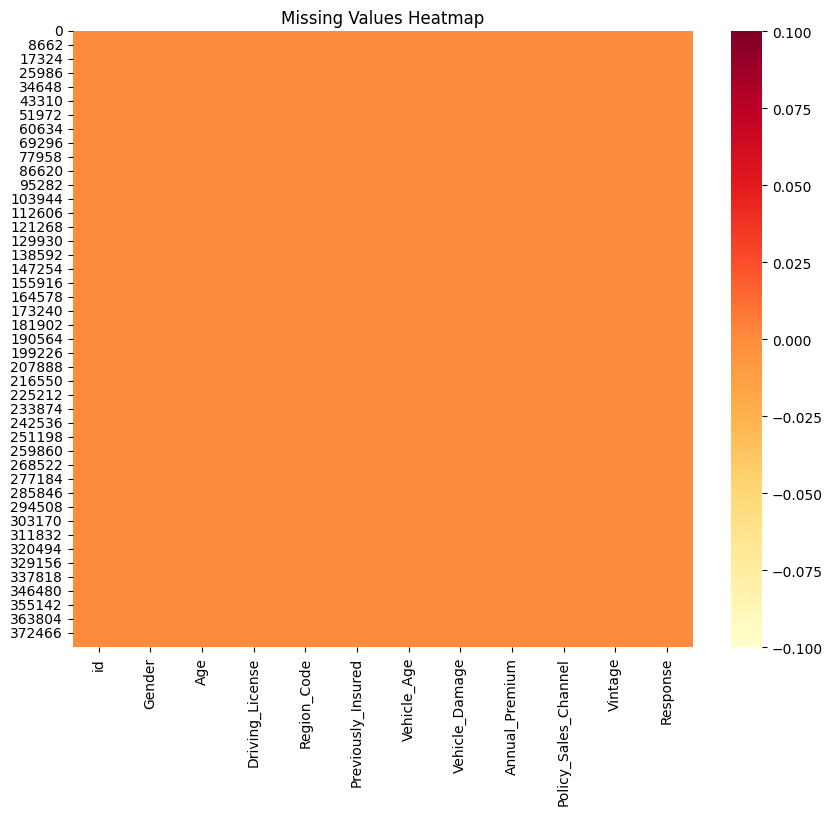

In [10]:
plt.figure(figsize=(10, 8))
# Create the heatmap with modified color and size
sns.heatmap(training_data.isnull(), cmap="YlOrRd")
plt.title('Missing Values Heatmap')
plt.show()

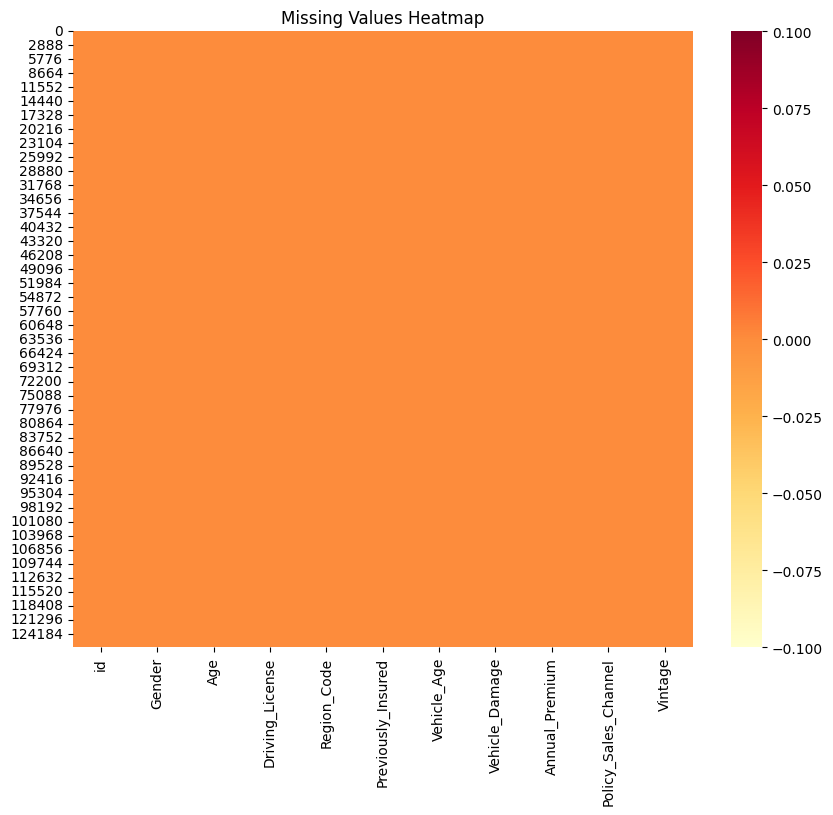

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(testing_data.isnull(), cmap="YlOrRd")
plt.title('Missing Values Heatmap')
plt.show()

<Axes: >

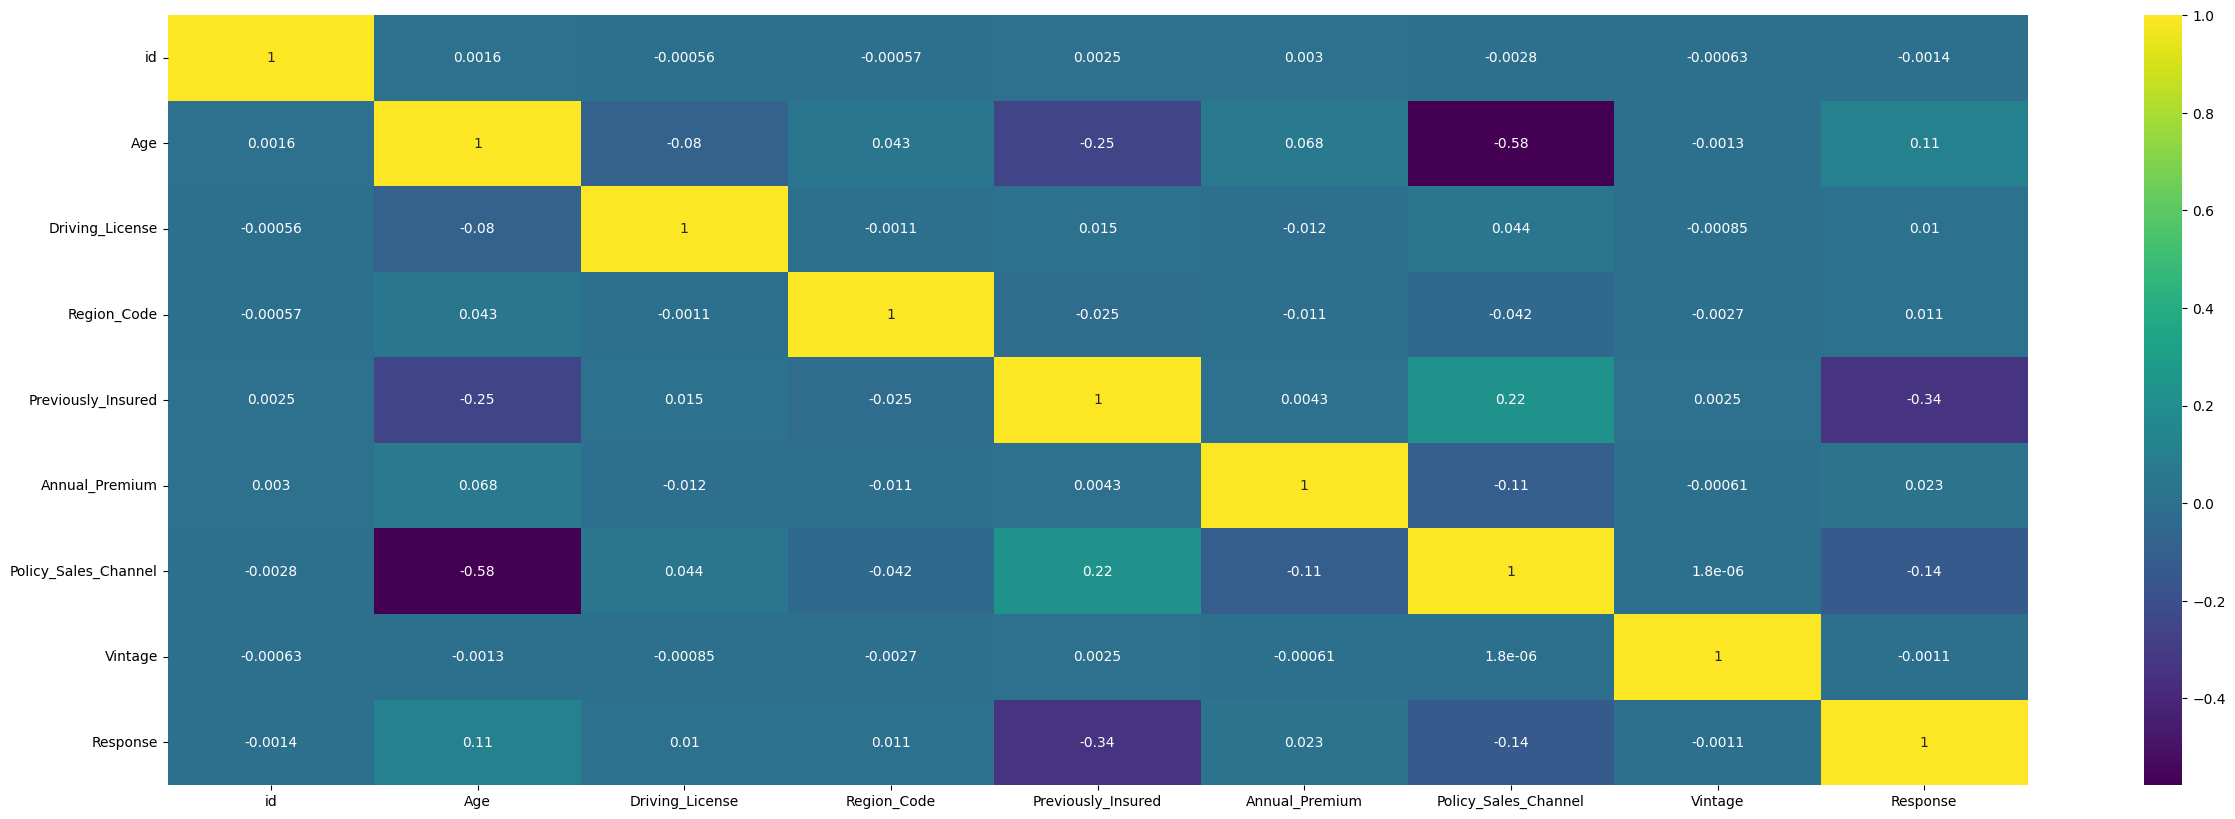

In [12]:
train_numeric = training_data._get_numeric_data()
corr = train_numeric.corr()
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(corr, cmap="viridis", annot=True)

<Axes: >

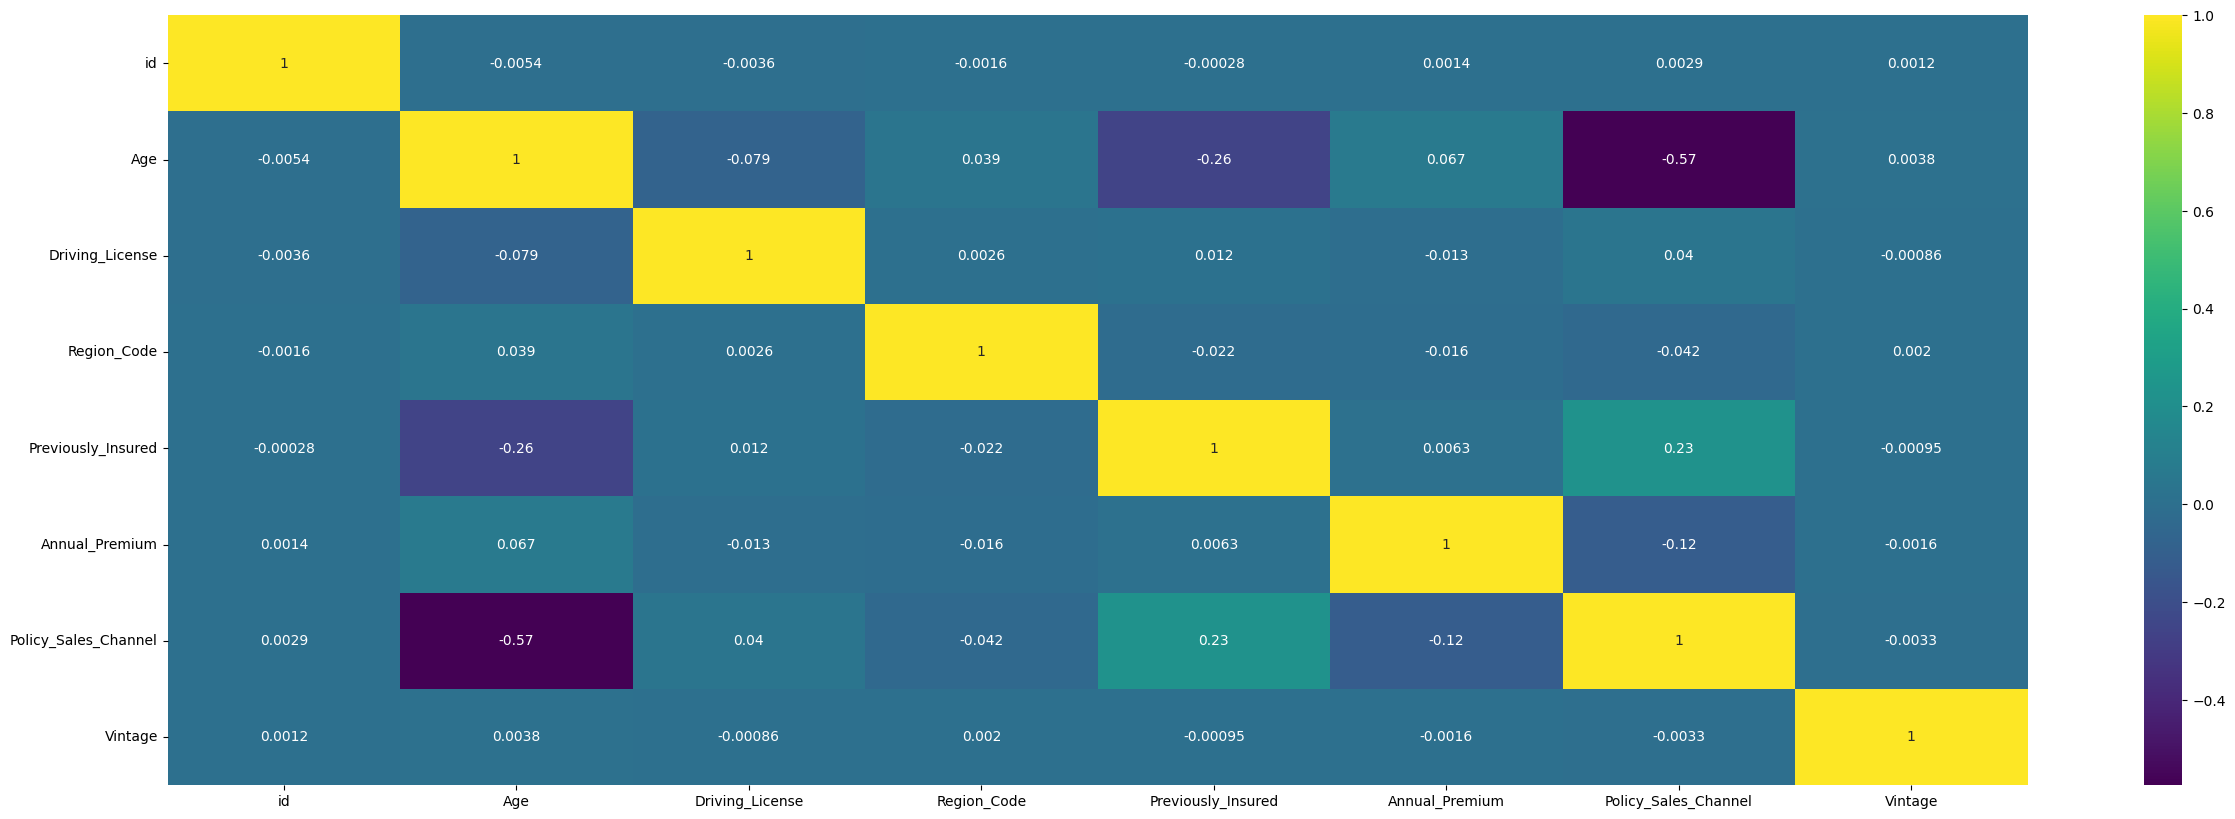

In [13]:
test_numeric = testing_data._get_numeric_data()
corr = test_numeric.corr()
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(corr, cmap="viridis", annot=True)

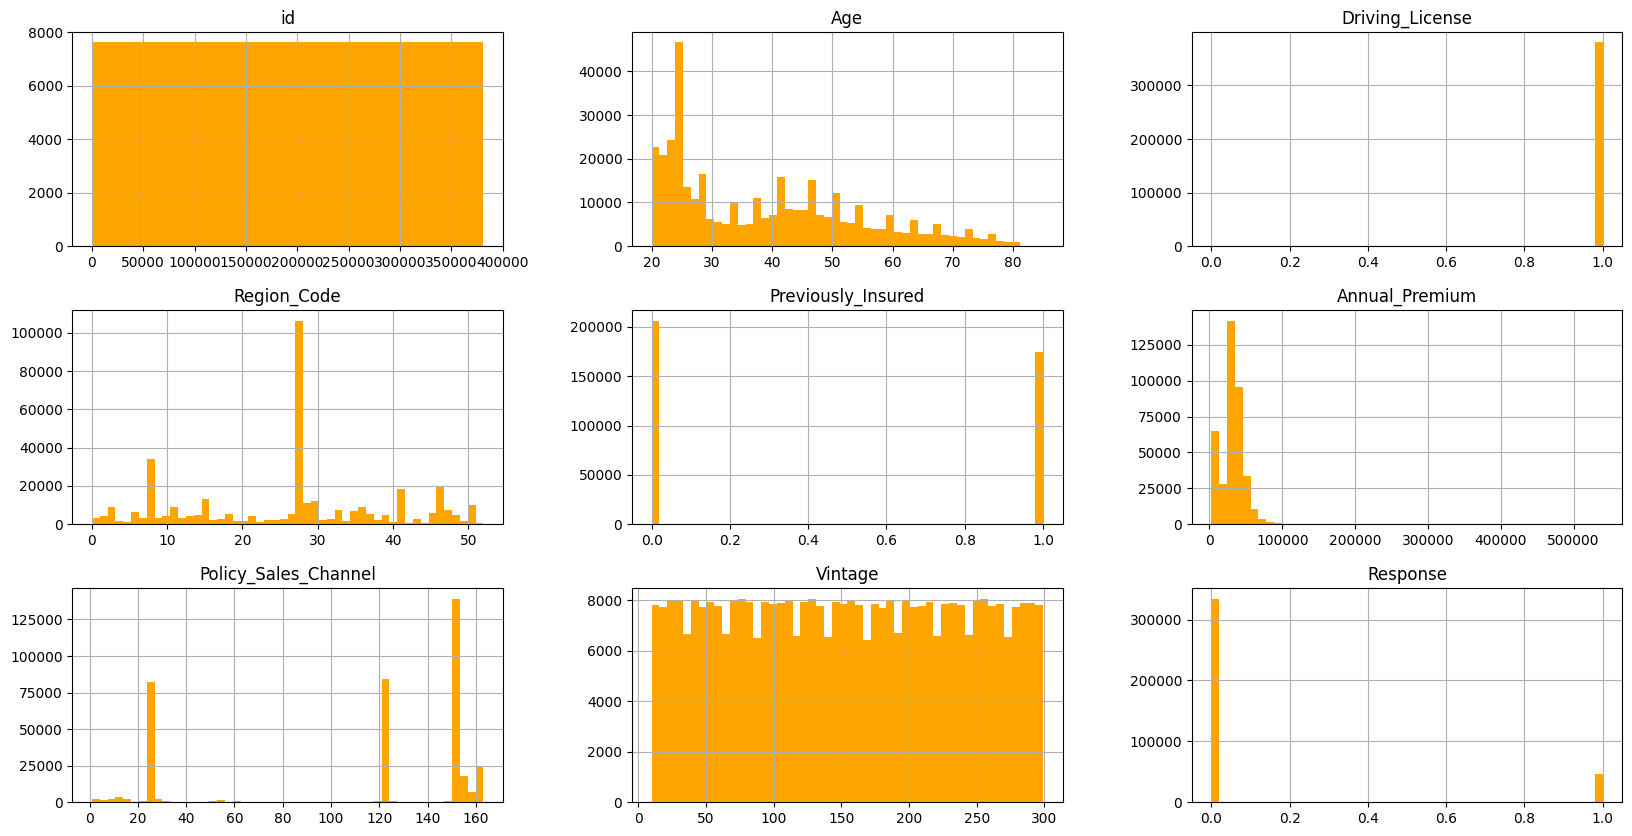

In [14]:
train_numeric.hist(figsize=(20,10), color='orange' ,bins=50, xlabelsize=10, ylabelsize=10);

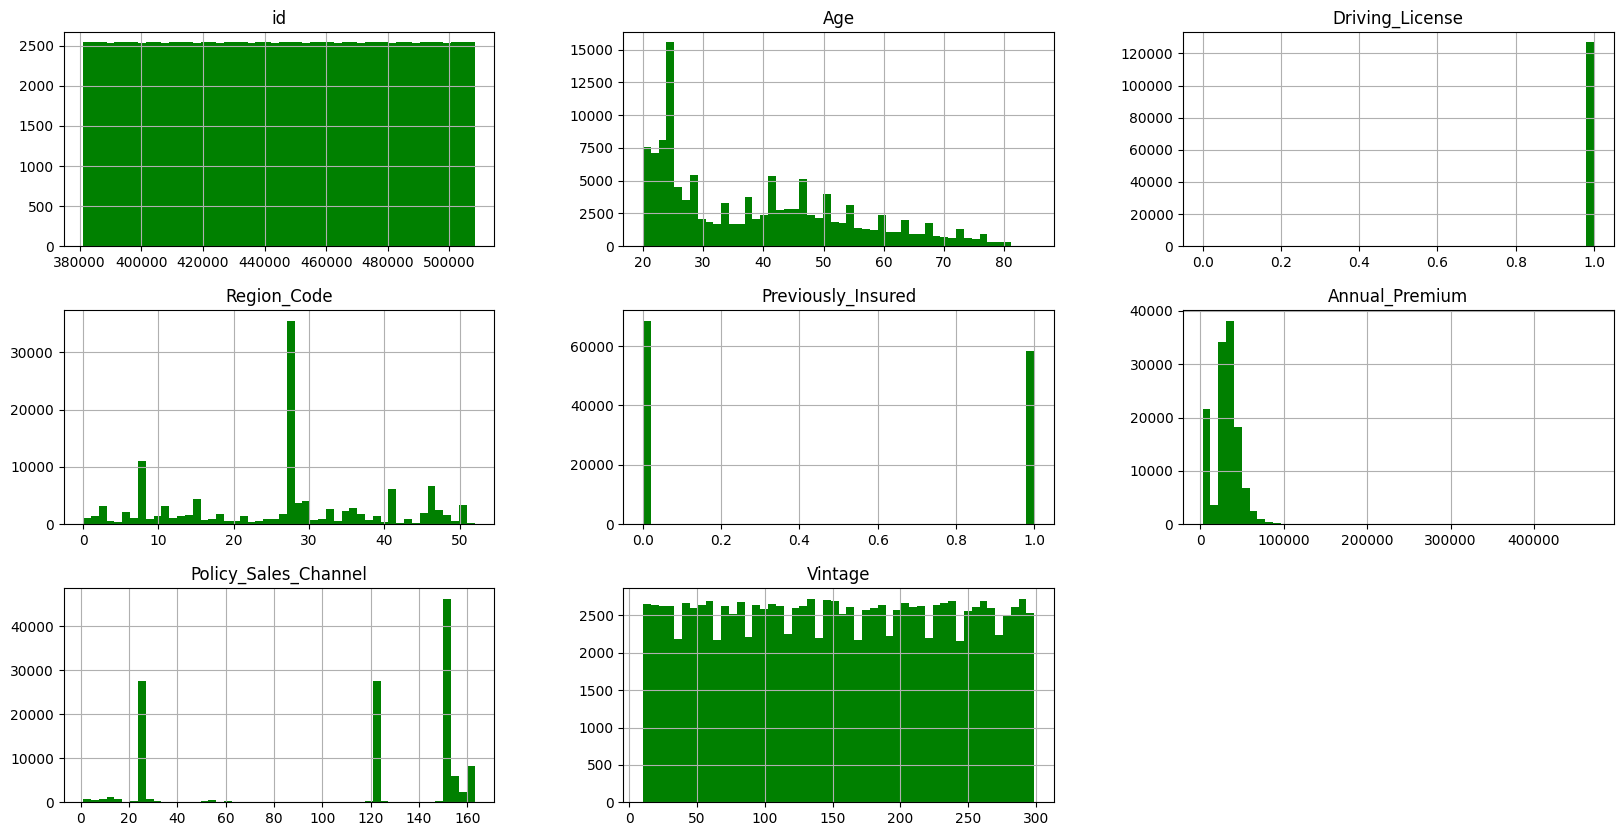

In [15]:
test_numeric.hist(figsize=(20,10), color='green' ,bins=50, xlabelsize=10, ylabelsize=10);

In [16]:
insurance_data_copy = train.copy()
columns_list=['Driving_License','Previously_Insured','Response']
for column in columns_list:
    insurance_data_copy[column] = insurance_data_copy[column].map({0:'No',1:'Yes'})

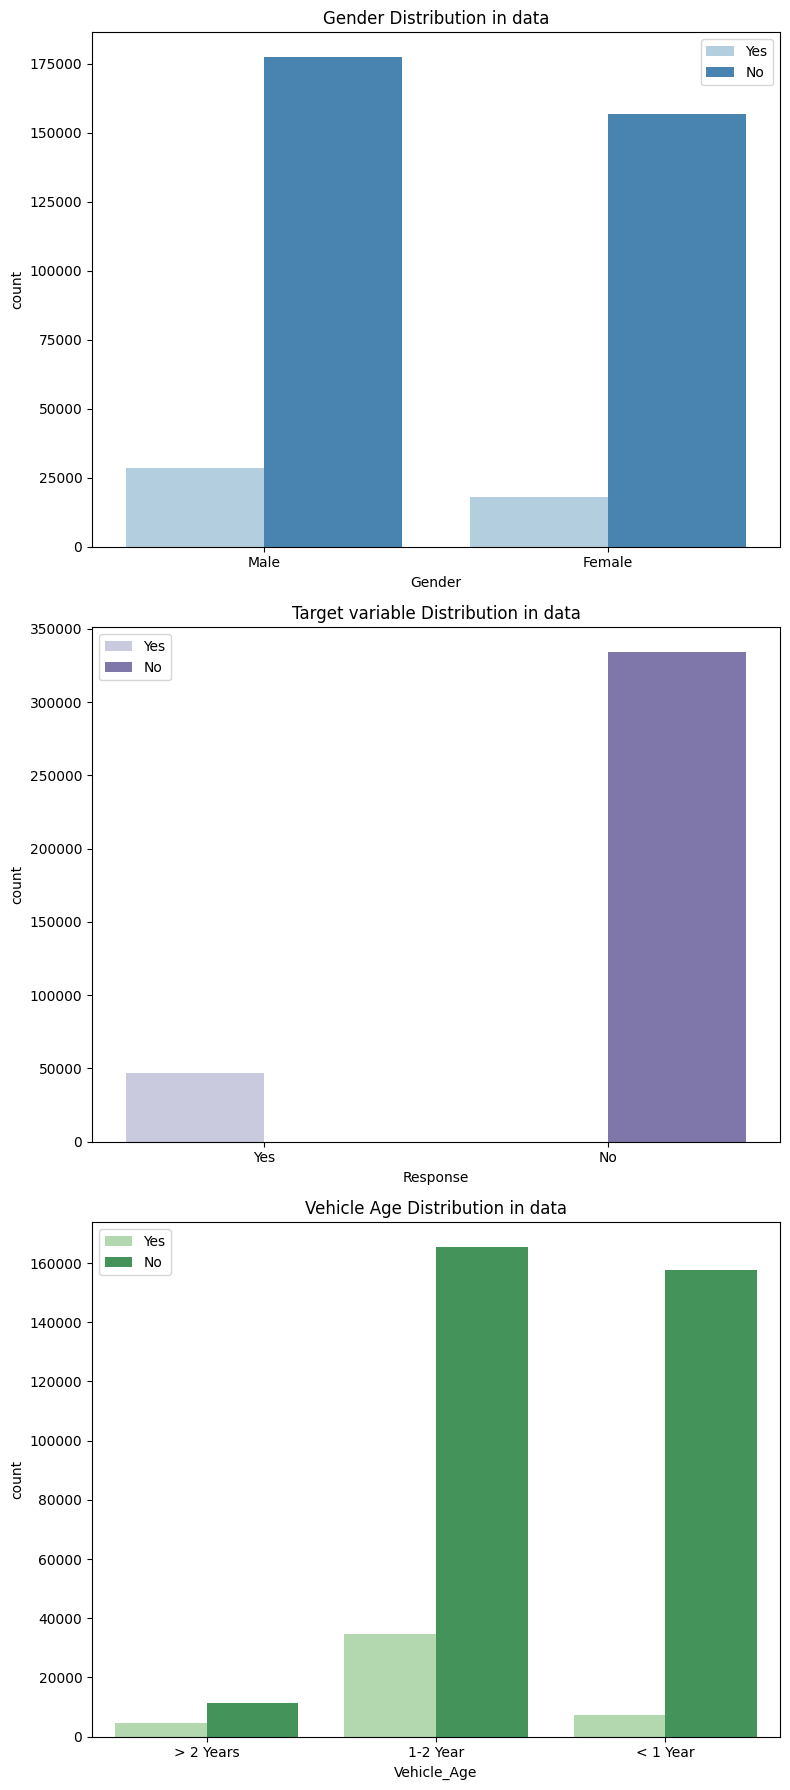

In [17]:
attributes = ['Gender', 'Response', 'Vehicle_Age']
color_schemes = ['Blues', 'Purples', 'Greens']
graph_titles = ['Gender Distribution in data', 'Target variable Distribution in data', 'Vehicle Age Distribution in data']

fig, axis = plt.subplots(len(attributes), 1, figsize=(8, len(attributes) * 6))

for i, attribute in enumerate(attributes):
    sns.countplot(data=insurance_data_copy, x=attribute, hue='Response', palette=color_schemes[i], ax=axis[i])
    axis[i].set_title(graph_titles[i])
    axis[i].legend()

plt.tight_layout()
plt.show()

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


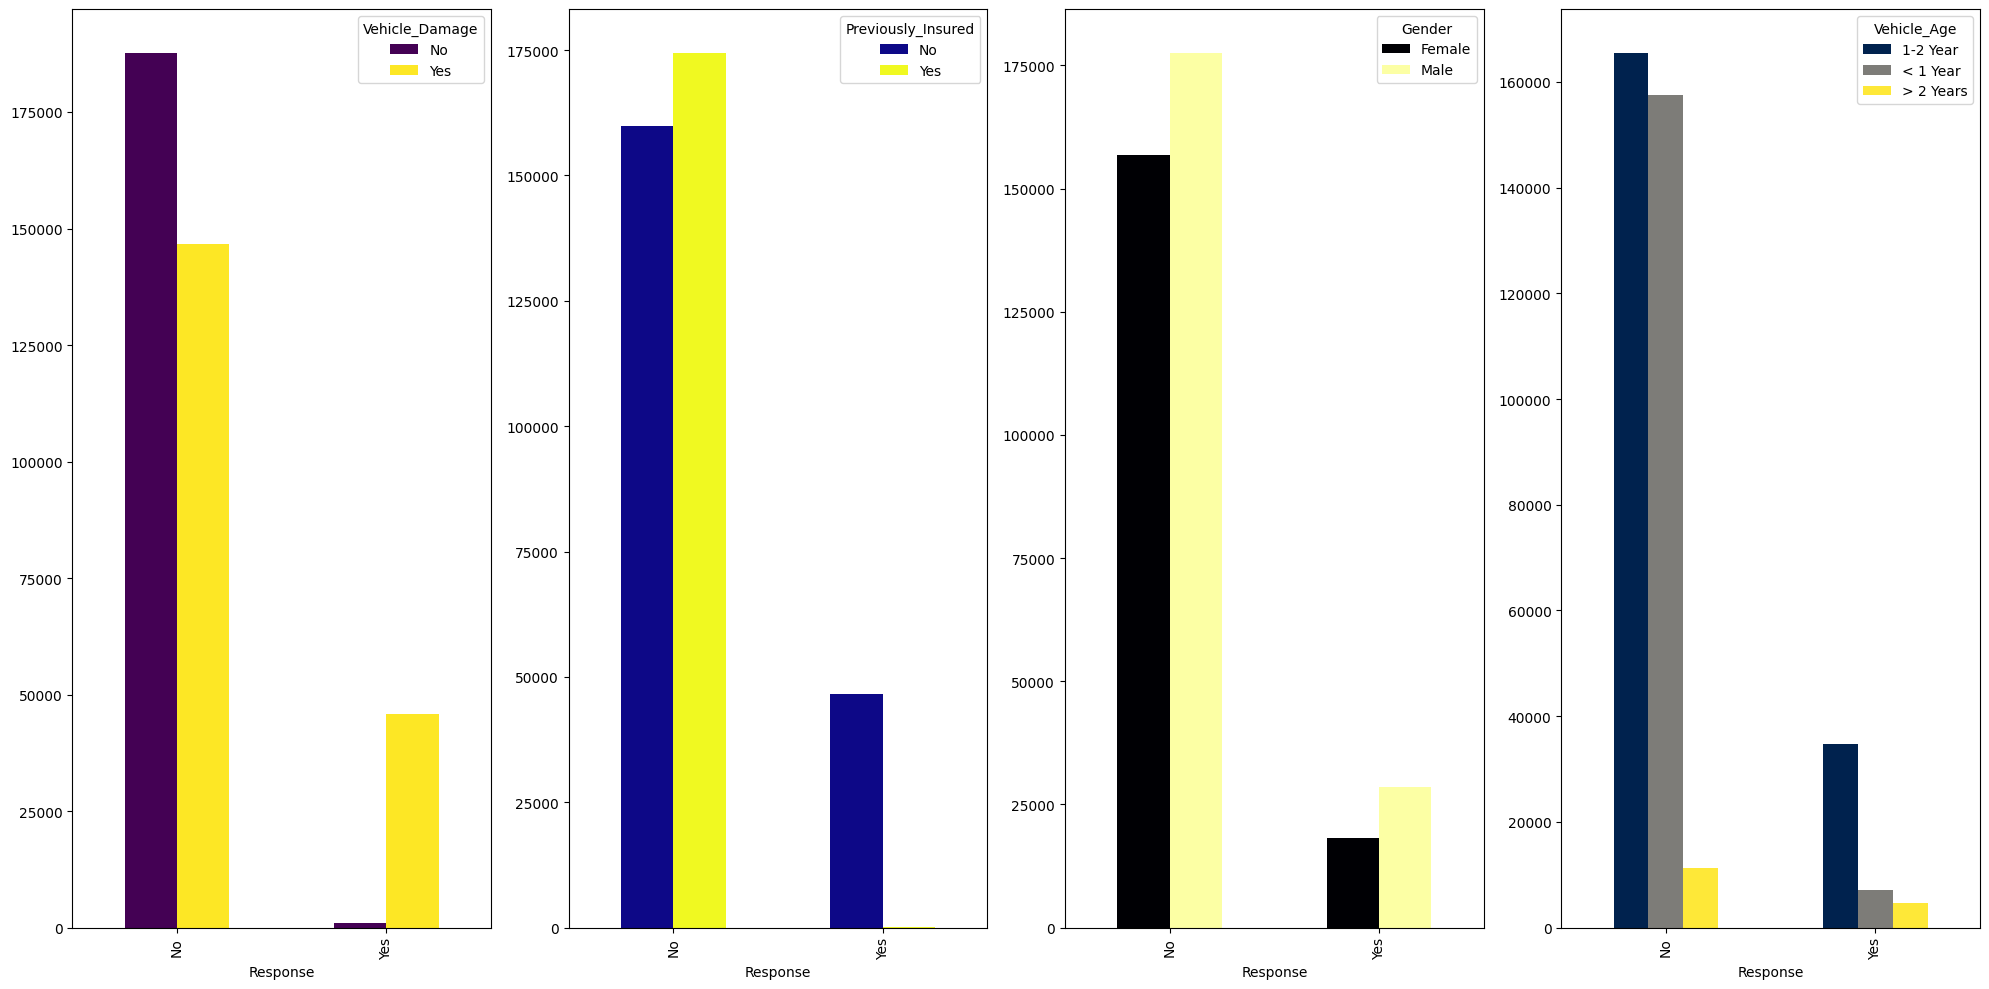

In [19]:
cross_tab_attributes = ['Vehicle_Damage', 'Previously_Insured', 'Gender', 'Vehicle_Age']
colors = ['viridis', 'plasma', 'inferno', 'cividis']

fig, axes = plt.subplots(nrows=1, ncols=len(cross_tab_attributes), figsize=(20, 10)) 
for attribute, color, ax in zip(cross_tab_attributes, colors, axes):
    pd.crosstab(insurance_data_copy['Response'], insurance_data_copy[attribute]).plot(kind='bar', colormap=color, ax=ax)

plt.tight_layout()
plt.show()

In [16]:
training_data['type'] = 'train'
testing_data['type'] = 'test'
combined_data = pd.concat([training_data, testing_data])
combined_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,type
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,train
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN,test
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN,test
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN,test
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN,test


In [17]:
substitutions = {
    'Gender': {'Male': 0, 'Female': 1},
    'Driving_License': {0: 0, 1: 1},
    'Previously_Insured': {0: 1, 1: 0},
    'Vehicle_Age': {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0},
    'Vehicle_Damage': {'Yes': 1, 'No': 0},
}

for column, mapping in substitutions.items():
    combined_data[column] = combined_data[column].replace(mapping)

for column in ['Policy_Sales_Channel', 'Region_Code']:
    combined_data[column] = combined_data[column].astype(int)

combined_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,type
0,1,0,44,1,28,1,2,1,40454.0,26,217,1.0,train
1,2,0,76,1,3,1,1,0,33536.0,26,183,0.0,train
2,3,0,47,1,28,1,2,1,38294.0,26,27,1.0,train
3,4,0,21,1,11,0,0,0,28619.0,152,203,0.0,train
4,5,1,29,1,41,0,0,0,27496.0,152,39,0.0,train


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_columns = ['Age', 'Vintage']
categorical_column = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

standard_scaler = StandardScaler()
combined_data[numeric_columns] = standard_scaler.fit_transform(combined_data[numeric_columns])

range_scaler = MinMaxScaler()
combined_data['Annual_Premium'] = range_scaler.fit_transform(combined_data['Annual_Premium'].values.reshape(-1, 1))

combined_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,type
0,1,0,0.334938,1,28,1,2,1,0.070366,26,0.748905,1.0,train
1,2,0,2.399432,1,3,1,1,0,0.057496,26,0.342540,0.0,train
2,3,0,0.528484,1,28,1,2,1,0.066347,26,-1.521956,1.0,train
3,4,0,-1.148918,1,11,0,0,0,0.048348,152,0.581578,0.0,train
4,5,1,-0.632794,1,41,0,0,0,0.046259,152,-1.378534,0.0,train


In [19]:
training_dataset = combined_data.loc[combined_data['type'] == 'train'].drop(['id', 'type'], axis=1)
training_dataset['Response'] = training_dataset['Response'].astype(int)

testing_dataset = combined_data.loc[combined_data['type'] == 'test'].drop(['id', 'type', 'Response'], axis=1)

for column in categorical_column:
    training_dataset[column] = training_dataset[column].astype(str)
    testing_dataset[column] = testing_dataset[column].astype(str)

training_dataset = training_dataset.drop('Vintage', axis=1)
testing_dataset = testing_dataset.drop('Vintage', axis=1)

features = training_dataset.drop('Response', axis=1)
target = training_dataset['Response']

categorical_columns_indices = [features.columns.get_loc(col) for col in categorical_column]

In [20]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [21]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.22, random_state=22, stratify=target, shuffle=True)

# CatBoostClassifier
cat_model = CatBoostClassifier(cat_features=categorical_columns_indices, early_stopping_rounds=100, verbose=100)
cat_model.fit(train_features, train_target)
cat_predictions = cat_model.predict_proba(test_features)[:, 1]
roc_auc_cat = roc_auc_score(test_target, cat_predictions, average='weighted')
print('CatBoost Validation ROC AUC Score:', roc_auc_cat)

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=22)
rf_model.fit(train_features, train_target)
rf_predictions = rf_model.predict_proba(test_features)[:, 1]
roc_auc_rf = roc_auc_score(test_target, rf_predictions, average='weighted')
print('Random Forest Validation ROC AUC Score:', roc_auc_rf)

# GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=22)
gb_model.fit(train_features, train_target)
gb_predictions = gb_model.predict_proba(test_features)[:, 1]
roc_auc_gb = roc_auc_score(test_target, gb_predictions, average='weighted')
print('Gradient Boosting Validation ROC AUC Score:', roc_auc_gb)

# AdaBoostClassifier
ab_model = AdaBoostClassifier(random_state=22)
ab_model.fit(train_features, train_target)
ab_predictions = ab_model.predict_proba(test_features)[:, 1]
roc_auc_ab = roc_auc_score(test_target, ab_predictions, average='weighted')
print('AdaBoost Validation ROC AUC Score:', roc_auc_ab)

# Logistic Regression
lr_model = LogisticRegression(random_state=22)
lr_model.fit(train_features, train_target)
lr_predictions = lr_model.predict_proba(test_features)[:, 1]
roc_auc_lr = roc_auc_score(test_target, lr_predictions, average='weighted')
print('Logistic Regression Validation ROC AUC Score:', roc_auc_lr)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(train_features, train_target)
knn_predictions = knn_model.predict_proba(test_features)[:, 1]
roc_auc_knn = roc_auc_score(test_target, knn_predictions, average='weighted')
print('K-Nearest Neighbors Validation ROC AUC Score:', roc_auc_knn)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=22)
dt_model.fit(train_features, train_target)
dt_predictions = dt_model.predict_proba(test_features)[:, 1]
roc_auc_dt = roc_auc_score(test_target, dt_predictions, average='weighted')
print('Decision Tree Validation ROC AUC Score:', roc_auc_dt)


Learning rate set to 0.11721
0:	learn: 0.5072130	total: 111ms	remaining: 1m 50s
100:	learn: 0.2634839	total: 5.22s	remaining: 46.4s
200:	learn: 0.2619184	total: 10.2s	remaining: 40.7s
300:	learn: 0.2609202	total: 15.4s	remaining: 35.7s
400:	learn: 0.2600313	total: 20.8s	remaining: 31s
500:	learn: 0.2591701	total: 26.1s	remaining: 26s
600:	learn: 0.2583677	total: 31.2s	remaining: 20.7s
700:	learn: 0.2575287	total: 36.5s	remaining: 15.6s
800:	learn: 0.2568126	total: 41.7s	remaining: 10.4s
900:	learn: 0.2559967	total: 46.9s	remaining: 5.16s
999:	learn: 0.2553125	total: 52s	remaining: 0us
CatBoost Validation ROC AUC Score: 0.8591161647584942
Random Forest Validation ROC AUC Score: 0.8135212996778263
Gradient Boosting Validation ROC AUC Score: 0.8558820731425107
AdaBoost Validation ROC AUC Score: 0.8516087033118636
Logistic Regression Validation ROC AUC Score: 0.8305655478497682
K-Nearest Neighbors Validation ROC AUC Score: 0.7610597347379359
Decision Tree Validation ROC AUC Score: 0.616037

In [23]:
from sklearn.model_selection import cross_val_score
# GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=22)
gb_model.fit(train_features, train_target)
gb_predictions = gb_model.predict_proba(test_features)[:, 1]
roc_auc_gb = roc_auc_score(test_target, gb_predictions, average='weighted')
print('Gradient Boosting Validation ROC AUC Score:', roc_auc_gb)

# Perform 5-fold cross-validation on GradientBoostingClassifier
scores = cross_val_score(gb_model, features, target, cv=10, scoring='roc_auc')
print("Gradient Boosting 5-Fold Cross Validation ROC AUC Score: ", scores.mean())

Gradient Boosting Validation ROC AUC Score: 0.8558820731425107
Gradient Boosting 5-Fold Cross Validation ROC AUC Score:  0.8559252445716578


In [25]:
from sklearn.metrics import make_scorer
cat_model = CatBoostClassifier(cat_features=categorical_columns_indices, early_stopping_rounds=100, verbose=100)
cat_model.fit(train_features, train_target)
cat_predictions = cat_model.predict_proba(test_features)[:, 1]
roc_auc_cat = roc_auc_score(test_target, cat_predictions, average='weighted')
print('CatBoost Validation ROC AUC Score:', roc_auc_cat)

cat_model_cross_val = CatBoostClassifier(cat_features=categorical_columns_indices, verbose=False)
cross_val_scores = cross_val_score(cat_model_cross_val, features, target, cv=10, 
                                   scoring=make_scorer(roc_auc_score, needs_proba=True))

print("CatBoost 5-Fold Cross Validation ROC AUC Score: ", cross_val_scores.mean())

Learning rate set to 0.11721
0:	learn: 0.5072130	total: 47.2ms	remaining: 47.1s
100:	learn: 0.2634839	total: 4.93s	remaining: 43.9s
200:	learn: 0.2619184	total: 10.1s	remaining: 40s
300:	learn: 0.2609202	total: 15.4s	remaining: 35.8s
400:	learn: 0.2600313	total: 20.9s	remaining: 31.3s
500:	learn: 0.2591701	total: 26.6s	remaining: 26.4s
600:	learn: 0.2583677	total: 32.2s	remaining: 21.4s
700:	learn: 0.2575287	total: 37.7s	remaining: 16.1s
800:	learn: 0.2568126	total: 43.1s	remaining: 10.7s
900:	learn: 0.2559967	total: 48.7s	remaining: 5.35s
999:	learn: 0.2553125	total: 54s	remaining: 0us
CatBoost Validation ROC AUC Score: 0.8591161647584942
CatBoost 5-Fold Cross Validation ROC AUC Score:  0.8583132831863797
